# 7. Bagging

The mai idea is that many weak learner are trained and then averaged together to get a strong final learner that provides accurate predictions.

Bagging is Bootstrap Aggregating:
* build a lot of different base learners on bootstrapped samples of the original dataset
* combine all the predictions made using (averaging) all the bootstrapped samples

Model averaging helps to:
* reduce variance
* avoid overfitting

Bagging works best for base learners with:
* low bias and high variance
* for example: deep decision trees

The combination of the predictions of the trees:
* AVERAGE prediction for a regression problem
* MAJORITY vote for a classification problem

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# generate synthetic data
x = np.linspace(start = 0, stop = 2 * np.pi, num=500)
m = 2 * np.sin(x)
y = m + np.random.normal(loc = 0, scale = 1, size = len(x))

In [3]:
# adding column name to array (and transforming it into pd.DataFrame)
df = pd.DataFrame({'y':y, 'm':m, 'feature_1':x})

In [26]:
sample_1 = df.sample(df.shape[0], replace = True)
sample_2 = df.sample(df.shape[0], replace = True)
sample_3 = df.sample(df.shape[0], replace = True)

In [38]:
# fit a very deep tree
x_1 = np.array(sample_1['feature_1']).reshape(-1,1)
y_1 = np.array(sample_1['y']).reshape(-1,1)

tree_1 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01).fit(x_1, y_1)

tree_1_pred = tree_1.predict(x_1)

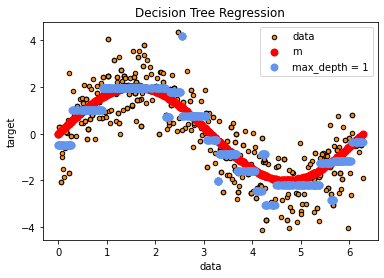

In [39]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x_1, y_1, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.scatter(x_1, sample_1.m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.scatter(x_1, tree_1_pred, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [40]:
# fit a very deep tree
x_2 = np.array(sample_2['feature_1']).reshape(-1,1)
y_2 = np.array(sample_2['y']).reshape(-1,1)

tree_2 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.1).fit(x_2, y_2)
tree_2_pred = tree_2.predict(x_2)

In [41]:
np.unique(tree_2_pred)

array([-1.60765781, -0.40198982,  0.36568276,  1.6328091 ])

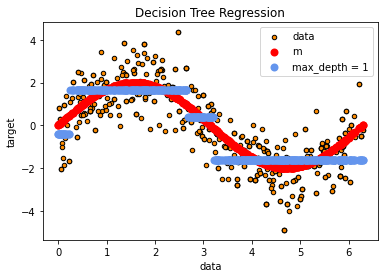

In [42]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x_2, y_2, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.scatter(x_2, sample_2.m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.scatter(x_2, tree_2_pred, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [31]:
tot_pred = np.mean([tree_1_pred,tree_2_pred], axis = 0)

In [43]:
# fit a very deep tree
x_3 = np.array(sample_3['feature_1']).reshape(-1,1)
y_3 = np.array(sample_3['y']).reshape(-1,1)

tree_3 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01).fit(x_3, y_3)

tree_3_pred = tree_3.predict(x_3)

In [53]:
tot_pred = np.mean([tree_1_pred,tree_2_pred,tree_3_pred], axis = 0)

In [54]:
tot_pred

array([ 0.09839451,  0.15688498, -0.06720427,  0.25482343,  0.2320932 ,
        1.57173851, -1.03264339, -0.02158196, -0.57494545, -1.46153209,
        1.8285119 ,  0.77000479,  1.07109668, -1.05964276, -0.35209943,
        0.05598513,  0.16359149, -1.44118875, -0.79558492,  0.28191377,
        0.25929244, -0.26630926, -0.61572845,  0.43646741, -0.31015085,
        0.16639196,  0.46442719,  0.30658146, -0.24694398, -0.4208629 ,
        0.15622878, -0.7288167 , -0.64874233,  0.67352588, -1.61103162,
       -1.12451607,  0.23405845, -1.34895473, -1.06766122,  1.07485297,
        0.9245129 , -1.20964455, -0.23666427, -0.25616802,  1.23675065,
        0.14037273,  0.43646741,  0.2320932 , -0.29381751, -0.99689267,
       -0.36488456,  1.882864  , -0.53694098,  1.22216682, -1.53789817,
        1.31421409, -0.42215945,  0.51671357, -0.34259598,  0.80619054,
        1.62533958, -0.00905896,  0.4246663 ,  1.46048856,  1.31421409,
        1.17147397,  0.15622878,  0.09048668,  0.07977947,  0.05

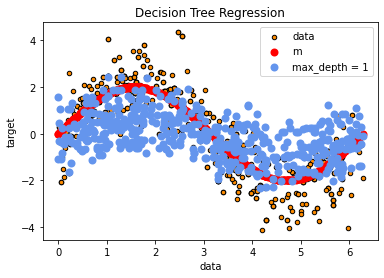

In [55]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x_1, y_1, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.scatter(x_1, sample_1.m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.scatter(x_1, tot_pred, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [58]:
from sklearn.ensemble import BaggingRegressor

In [67]:
# fit a very deep tree
x = np.array(df['feature_1']).reshape(-1,1)
y = np.array(df['y']).ravel()

In [107]:
bagging_regr = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01), n_estimators=1000, random_state=0).fit(x, y)

In [108]:
pred = bagging_regr.predict(x)

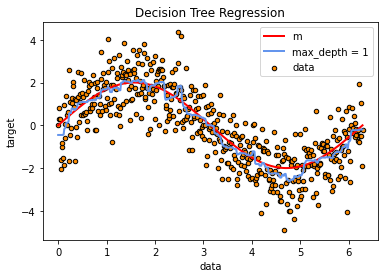

In [109]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, pred, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()